In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../data/01 Raw/icml_face_data.csv'
df = pd.read_csv(path)


In [2]:
df.columns = df.columns.map(lambda x: x.strip().lower())
x = df.pixels.str.split().explode().astype(int).values

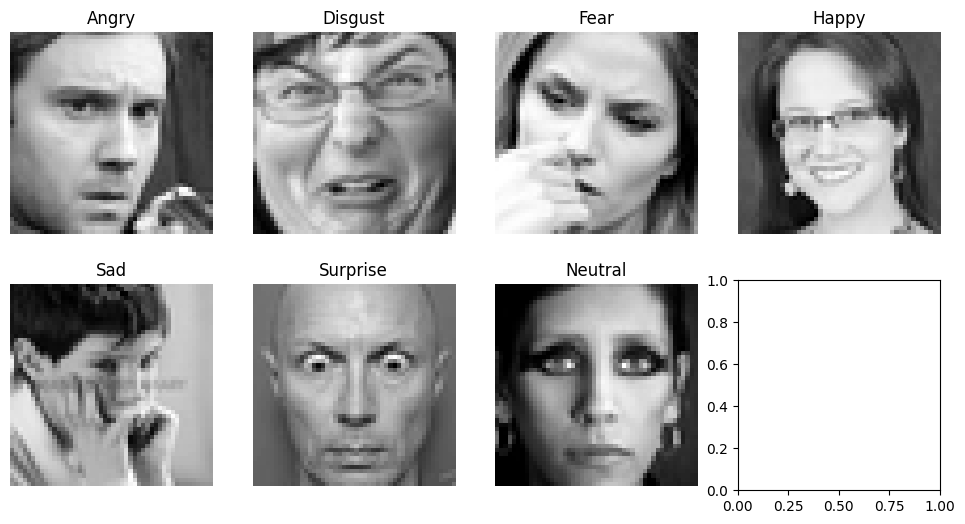

In [7]:
labels = {0 : 'Angry',
              1 : 'Disgust',
              2 : 'Fear',
              3 : 'Happy',
              4 : 'Sad',
              5 : 'Surprise',
              6 : 'Neutral'}
X = x.reshape(-1,48,48)

fig, ax = plt.subplots(2, 4, figsize=(12, 6))
for i in range(7):
    idx = df.loc[df.emotion == i].index[0]
    ax[i//4, i%4].imshow(X[idx], cmap='gray')
    ax[i//4, i%4].set_title(labels[i])
    ax[i//4, i%4].axis('off')

    

In [8]:
df.usage.value_counts()

usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [9]:
df.emotion.value_counts(normalize=True)

emotion
3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: proportion, dtype: float64

In [10]:
(
    df.assign(label=df.emotion.map(labels))
    .loc[df.usage == 'Training']
    .groupby('label')
    .agg(count = ('pixels', 'count'))
    .plot(kind='bar', backend='plotly')
    .update_layout(title='Distribution of Emotions in Training Set',showlegend=False)
)


In [15]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df.emotion, random_state=42)
df_train.emotion.value_counts()


emotion
3    7191
6    4958
4    4861
2    4097
0    3962
5    3202
1     438
Name: count, dtype: int64

In [14]:
df_test.emotion.value_counts()

emotion
3    1798
6    1240
4    1216
2    1024
0     991
5     800
1     109
Name: count, dtype: int64

In [16]:
from sklearn.utils import resample

def balance_labels(df, label_col):
    max_count = df[label_col].value_counts().max()
    balanced = pd.concat([
        resample(group, replace=True, n_samples=max_count, random_state=42)
        for _, group in df.groupby(label_col)
    ])
    return balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced = balance_labels(df_train, 'emotion')


In [17]:
(
    df_balanced.assign(label=df_balanced.emotion.map(labels))
    .loc[df_balanced.usage == 'Training']
    .groupby('label')
    .agg(count = ('pixels', 'count'))
    .plot(kind='bar', backend='plotly')
    .update_layout(title='Distribution of Emotions in Training Set',showlegend=False)
)

In [19]:
df_balanced.to_pickle('../data/02 Processed/balancedData.pkl')
df_test.to_pickle('../data/02 Processed/testData.pkl')

In [99]:
df_balanced

,emotion,usage,pixels
0,2,Training,31 47 59 32 27 33 30 34 28 23 38 37 62 45 37 1...
1,6,Training,47 36 36 36 34 40 39 39 33 35 41 39 50 73 94 1...
2,1,Training,13 4 5 2 2 4 5 5 3 3 4 12 19 31 49 66 77 82 86...
3,3,Training,24 26 22 16 17 20 25 46 74 98 131 145 151 154 ...
4,6,PrivateTest,32 44 46 49 52 73 82 89 98 102 104 106 108 111...
...,...,...,...
62918,6,Training,194 95 153 165 79 48 49 59 54 46 47 68 118 165...
62919,4,Training,119 66 34 28 16 9 10 9 9 9 9 9 9 10 10 11 11 1...
62920,0,Training,108 100 102 106 116 134 140 135 122 95 119 161...
62921,1,Training,114 109 111 97 91 84 86 85 77 92 124 136 92 10...
